In [282]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from eval_util import make_compare_plot,plot_cdf,plot_pdf,make_prediction_diff,make_prediction,DCR, hitting_rate, make_clustering,convert_type
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import numpy
from tqdm import tqdm
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import os
import glob
%matplotlib inline

In [382]:
adult_acc = pd.read_csv("adult_sex_acc.csv", index_col=0)
adult_f1 = pd.read_csv("adult_sex_f1.csv", index_col=0)

In [383]:
covertype_acc = pd.read_csv("covertype_covertype_acc.csv", index_col=0)
covertype_f1 = pd.read_csv("covertype_covertype_f1.csv", index_col=0)

In [384]:
credit_acc = pd.read_csv("cr_class_acc.csv", index_col=0)
credit_f1 = pd.read_csv("cr_class_f1.csv", index_col=0)

In [385]:
t_acc = pd.read_csv("t_mktcoupons_acc.csv", index_col=0)
t_f1 = pd.read_csv("t_mktcoupons_f1.csv", index_col=0)

In [386]:
n_acc = pd.read_csv("n_liftstyle_acc.csv", index_col=0)
n_f1 = pd.read_csv("n_liftstyle_f1.csv", index_col=0)

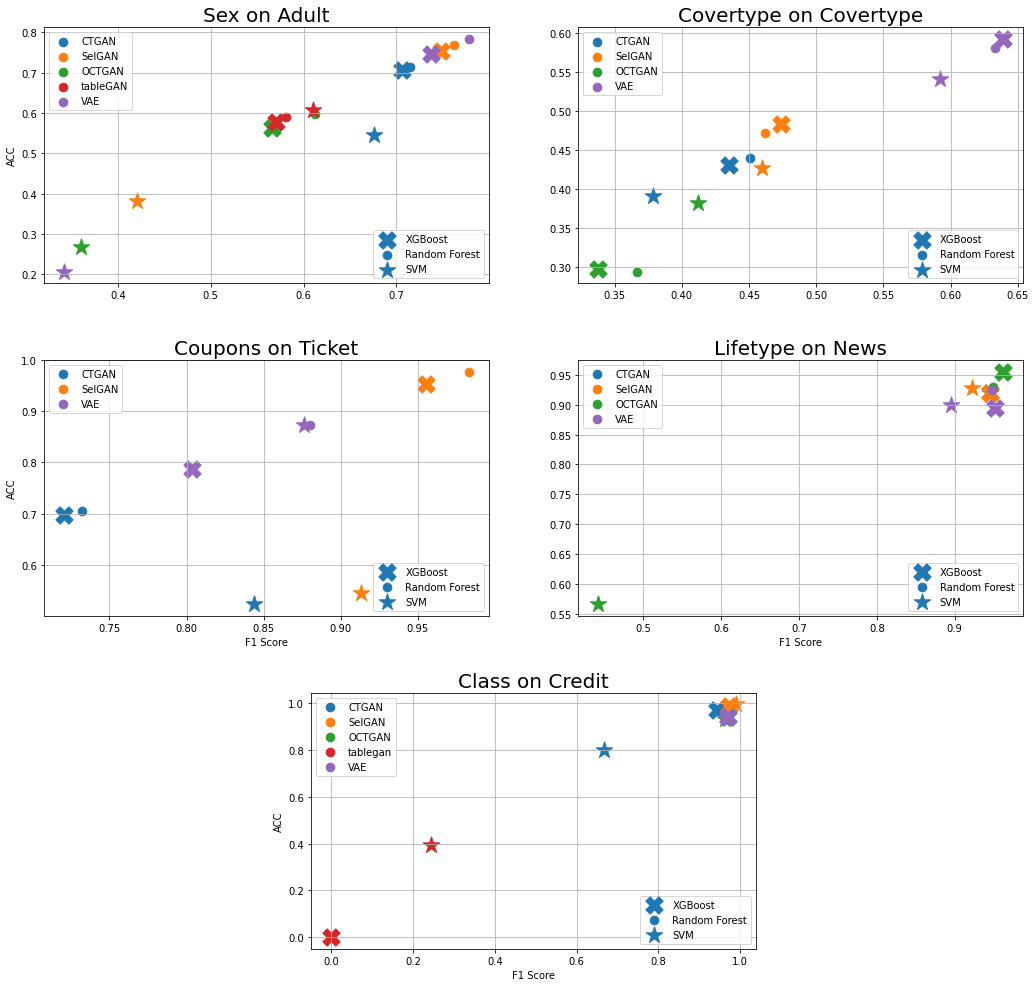

In [405]:
import matplotlib.gridspec as gridspec
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']

fig, ax = plt.subplots(figsize = (17,16))
gs = gridspec.GridSpec(3, 4)
gs.update(wspace=0.5)



ax1 = plt.subplot(gs[0, :2], )
ax2 = plt.subplot(gs[0, 2:])
ax3 = plt.subplot(gs[1, :2], )
ax4 = plt.subplot(gs[1, 2:])
ax5 = plt.subplot(gs[2, 1:3], )


xgb_ctgan = ax1.scatter(adult_acc["XGB"]["CTGAN"], adult_f1["XGB"]["CTGAN"], marker='X', color=colors[0],s = 300)
rf_ctgan = ax1.scatter(adult_acc["RF"]["CTGAN"], adult_f1["RF"]["CTGAN"], marker='.', color=colors[0],s = 300,label = "CTGAN")
svm_ctgan = ax1.scatter(adult_acc["SVM"]["CTGAN"], adult_f1["SVM"]["CTGAN"], marker='*', color=colors[0],s = 300)



xgb_selgan = ax1.scatter(adult_acc["XGB"]["Selgan"], adult_f1["XGB"]["Selgan"], marker='X', color=colors[1],s = 300)
rf_selgan = ax1.scatter(adult_acc["RF"]["Selgan"], adult_f1["RF"]["Selgan"], marker='.', color=colors[1],s = 300,label = "SelGAN")
svm_selgan = ax1.scatter(adult_acc["SVM"]["Selgan"], adult_f1["SVM"]["Selgan"], marker='*', color=colors[1],s = 300)

xgb_octgan = ax1.scatter(adult_acc["XGB"]["octgan"], adult_f1["XGB"]["octgan"], marker='X', color=colors[2],s = 300)
rf_octgan = ax1.scatter(adult_acc["RF"]["octgan"], adult_f1["RF"]["octgan"], marker='.', color=colors[2],s = 300,label = "OCTGAN")
svm_octgan = ax1.scatter(adult_acc["SVM"]["octgan"], adult_f1["SVM"]["octgan"], marker='*', color=colors[2],s = 300)

xgb_tablegan = ax1.scatter(adult_acc["XGB"]["tablegan"], adult_f1["XGB"]["tablegan"], marker='X', color=colors[3],s = 300)
rf_tablegan = ax1.scatter(adult_acc["RF"]["tablegan"], adult_f1["RF"]["tablegan"], marker='.', color=colors[3],s = 300,label = "tableGAN")
svm_tablegan = ax1.scatter(adult_acc["SVM"]["tablegan"], adult_f1["SVM"]["tablegan"], marker='*', color=colors[3],s = 300)

xgb_vae = ax1.scatter(adult_acc["XGB"]["VAE"], adult_f1["XGB"]["VAE"], marker='X', color=colors[4],s = 300)
rf_vae = ax1.scatter(adult_acc["RF"]["VAE"], adult_f1["RF"]["VAE"], marker='.', color=colors[4],s = 300,label = "VAE")
svm_vae = ax1.scatter(adult_acc["SVM"]["VAE"], adult_f1["SVM"]["VAE"], marker='*', color=colors[4],s = 300)

ax1.grid()
#plt.legend()

#ax1.set_xlabel("F1 Score")
ax1.set_ylabel("ACC")

le1 = ax1.legend((rf_ctgan, rf_selgan, rf_octgan, rf_tablegan, rf_vae),
           ('CTGAN', 'SelGAN', 'OCTGAN', 'tableGAN', 'VAE'),
           loc='upper left')
ax1.add_artist(le1)

le2 = ax1.legend((xgb_ctgan, rf_ctgan,svm_ctgan),
           ('XGBoost', 'Random Forest',"SVM"),
           loc='lower right')

ax1.set_title("Sex on Adult", fontsize=20)



###########


xgb_ctgan = ax2.scatter(covertype_acc["XGB"]["CTGAN"], covertype_f1["XGB"]["CTGAN"], marker='X', color=colors[0],s = 300)
rf_ctgan = ax2.scatter(covertype_acc["RF"]["CTGAN"], covertype_f1["RF"]["CTGAN"], marker='.', color=colors[0],s = 300,label = "CTGAN")
svm_ctgan = ax2.scatter(covertype_acc["SVM"]["CTGAN"], covertype_f1["SVM"]["CTGAN"], marker='*', color=colors[0],s = 300)

xgb_selgan = ax2.scatter(covertype_acc["XGB"]["Selgan"], covertype_f1["XGB"]["Selgan"], marker='X', color=colors[1],s = 300)
rf_selgan = ax2.scatter(covertype_acc["RF"]["Selgan"], covertype_f1["RF"]["Selgan"], marker='.', color=colors[1],s = 300,label = "SelGAN")
svm_selgan = ax2.scatter(covertype_acc["SVM"]["Selgan"], covertype_f1["SVM"]["Selgan"], marker='*', color=colors[1],s = 300)

xgb_octgan = ax2.scatter(covertype_acc["XGB"]["octgan"], covertype_f1["XGB"]["octgan"], marker='X', color=colors[2],s = 300)
rf_octgan = ax2.scatter(covertype_acc["RF"]["octgan"], covertype_f1["RF"]["octgan"], marker='.', color=colors[2],s = 300,label = "OCTGAN")
svm_octgan = ax2.scatter(covertype_acc["SVM"]["octgan"], covertype_f1["SVM"]["octgan"], marker='*', color=colors[2],s = 300)

# xgb_tablegan = ax2.scatter(covertype_acc["XGB"]["tablegan"], adult_f1["XGB"]["tablegan"], marker='X', color=colors[3],s = 300)
# rf_tablegan = ax2.scatter(covertype_acc["RF"]["tablegan"], adult_f1["RF"]["tablegan"], marker='.', color=colors[3],s = 300,label = "tableGAN")
# svm_tablegan = ax2.scatter(covertype_acc["SVM"]["tablegan"], adult_f1["SVM"]["tablegan"], marker='*', color=colors[3],s = 300)

xgb_vae = ax2.scatter(covertype_acc["XGB"]["VAE"], covertype_f1["XGB"]["VAE"], marker='X', color=colors[4],s = 300)
rf_vae = ax2.scatter(covertype_acc["RF"]["VAE"], covertype_f1["RF"]["VAE"], marker='.', color=colors[4],s = 300,label = "VAE")
svm_vae = ax2.scatter(covertype_acc["SVM"]["VAE"], covertype_f1["SVM"]["VAE"], marker='*', color=colors[4],s = 300)

ax2.grid()
#plt.legend()

# ax2.set_xlabel("F1 Score")
# ax2.set_ylabel("ACC")

le1 = ax2.legend((rf_ctgan, rf_selgan, rf_octgan, rf_vae),
           ('CTGAN', 'SelGAN', 'OCTGAN', 'VAE'),
           loc='upper left')
ax2.add_artist(le1)

le2 = ax2.legend((xgb_ctgan, rf_ctgan,svm_ctgan),
           ('XGBoost', 'Random Forest',"SVM"),
           loc='lower right')

ax2.set_title("Covertype on Covertype", fontsize=20)


xgb_ctgan = ax5.scatter(credit_acc["XGB"]["CTGAN"], credit_f1["XGB"]["CTGAN"], marker='X', color=colors[0],s = 300)
rf_ctgan = ax5.scatter(credit_acc["RF"]["CTGAN"], credit_f1["RF"]["CTGAN"], marker='.', color=colors[0],s = 300,label = "CTGAN")
svm_ctgan = ax5.scatter(credit_acc["SVM"]["CTGAN"], credit_f1["SVM"]["CTGAN"], marker='*', color=colors[0],s = 300)


xgb_selgan = ax5.scatter(credit_acc["XGB"]["Selgan"], credit_f1["XGB"]["Selgan"], marker='X', color=colors[1],s = 300)
rf_selgan = ax5.scatter(credit_acc["RF"]["Selgan"], credit_f1["RF"]["Selgan"], marker='.', color=colors[1],s = 300,label = "SelGAN")
svm_selgan = ax5.scatter(credit_acc["SVM"]["Selgan"], credit_f1["SVM"]["Selgan"], marker='*', color=colors[1],s = 300)

xgb_octgan = ax5.scatter(credit_acc["XGB"]["octgan"], credit_f1["XGB"]["octgan"], marker='X', color=colors[2],s = 300)
rf_octgan = ax5.scatter(credit_acc["RF"]["octgan"], credit_f1["RF"]["octgan"], marker='.', color=colors[2],s = 300,label = "OCTGAN")
svm_octgan = ax5.scatter(credit_acc["SVM"]["octgan"], credit_f1["SVM"]["octgan"], marker='*', color=colors[2],s = 300)

xgb_tablegan = ax5.scatter(credit_acc["XGB"]["tablegan"], credit_f1["XGB"]["tablegan"], marker='X', color=colors[3],s = 300)
rf_tablegan = ax5.scatter(credit_acc["RF"]["tablegan"], credit_f1["RF"]["tablegan"], marker='.', color=colors[3],s = 300,label = "tableGAN")
svm_tablegan = ax5.scatter(credit_acc["SVM"]["tablegan"], credit_f1["SVM"]["tablegan"], marker='*', color=colors[3],s = 300)

xgb_vae = ax5.scatter(credit_acc["XGB"]["VAE"], credit_f1["XGB"]["VAE"], marker='X', color=colors[4],s = 300)
rf_vae = ax5.scatter(credit_acc["RF"]["VAE"], credit_f1["RF"]["VAE"], marker='.', color=colors[4],s = 300,label = "VAE")
svm_vae = ax5.scatter(credit_acc["SVM"]["VAE"], credit_f1["SVM"]["VAE"], marker='*', color=colors[4],s = 300)

ax5.grid()
#plt.legend()

ax5.set_xlabel("F1 Score")
ax5.set_ylabel("ACC")

le1 = ax5.legend((rf_ctgan, rf_selgan, rf_octgan, rf_tablegan,rf_vae),
           ('CTGAN', 'SelGAN', 'OCTGAN',"tablegan", 'VAE'),
           loc='upper left')
ax5.add_artist(le1)

le2 = ax5.legend((xgb_ctgan, rf_ctgan,svm_ctgan),
           ('XGBoost', 'Random Forest',"SVM"),
           loc='lower right')

ax5.set_title("Class on Credit", fontsize=20)



xgb_ctgan = ax4.scatter(n_acc["XGB"]["CTGAN"], n_f1["XGB"]["CTGAN"], marker='X', color=colors[0],s = 300)
rf_ctgan = ax4.scatter(n_acc["RF"]["CTGAN"], n_f1["RF"]["CTGAN"], marker='.', color=colors[0],s = 300,label = "CTGAN")
svm_ctgan = ax4.scatter(n_acc["SVM"]["CTGAN"], n_f1["SVM"]["CTGAN"], marker='*', color=colors[0],s = 300)

xgb_selgan = ax4.scatter(n_acc["XGB"]["Selgan"], n_f1["XGB"]["Selgan"], marker='X', color=colors[1],s = 300)
rf_selgan = ax4.scatter(n_acc["RF"]["Selgan"], n_f1["RF"]["Selgan"], marker='.', color=colors[1],s = 300,label = "SelGAN")
svm_selgan = ax4.scatter(n_acc["SVM"]["Selgan"], n_f1["SVM"]["Selgan"], marker='*', color=colors[1],s = 300)

xgb_octgan = ax4.scatter(n_acc["XGB"]["octgan"], n_f1["XGB"]["octgan"], marker='X', color=colors[2],s = 300)
rf_octgan = ax4.scatter(n_acc["RF"]["octgan"], n_f1["RF"]["octgan"], marker='.', color=colors[2],s = 300,label = "OCTGAN")
svm_octgan = ax4.scatter(n_acc["SVM"]["octgan"], n_f1["SVM"]["octgan"], marker='*', color=colors[2],s = 300)

# xgb_tablegan = ax4.scatter(n_acc["XGB"]["tablegan"], n_f1["XGB"]["tablegan"], marker='X', color=colors[3],s = 300)
# rf_tablegan = ax4.scatter(n_acc["RF"]["tablegan"], n_f1["RF"]["tablegan"], marker='.', color=colors[3],s = 300,label = "tableGAN")
# svm_tablegan = ax4.scatter(n_acc["SVM"]["tablegan"], n_f1["SVM"]["tablegan"], marker='*', color=colors[3],s = 300)

xgb_vae = ax4.scatter(n_acc["XGB"]["VAE"], n_f1["XGB"]["VAE"], marker='X', color=colors[4],s = 300)
rf_vae = ax4.scatter(n_acc["RF"]["VAE"], n_f1["RF"]["VAE"], marker='.', color=colors[4],s = 300,label = "VAE")
svm_vae = ax4.scatter(n_acc["SVM"]["VAE"], n_f1["SVM"]["VAE"], marker='*', color=colors[4],s = 300)

ax4.grid()
#plt.legend()

ax4.set_xlabel("F1 Score")
#ax4.set_ylabel("ACC")

le1 = ax4.legend((rf_ctgan, rf_selgan, rf_octgan,rf_vae),
           ('CTGAN', 'SelGAN', 'OCTGAN', 'VAE'),
           loc='upper left')
ax4.add_artist(le1)

le2 = ax4.legend((xgb_ctgan, rf_ctgan,svm_ctgan),
           ('XGBoost', 'Random Forest',"SVM"),
           loc='lower right')

ax4.set_title("Lifetype on News", fontsize=20)




xgb_ctgan = ax3.scatter(t_acc["XGB"]["CTGAN"], t_f1["XGB"]["CTGAN"], marker='X', color=colors[0],s = 300)
rf_ctgan = ax3.scatter(t_acc["RF"]["CTGAN"], t_f1["RF"]["CTGAN"], marker='.', color=colors[0],s = 300,label = "CTGAN")
svm_ctgan = ax3.scatter(t_acc["SVM"]["CTGAN"], t_f1["SVM"]["CTGAN"], marker='*', color=colors[0],s = 300)

xgb_selgan = ax3.scatter(t_acc["XGB"]["Selgan"], t_f1["XGB"]["Selgan"], marker='X', color=colors[1],s = 300)
rf_selgan = ax3.scatter(t_acc["RF"]["Selgan"], t_f1["RF"]["Selgan"], marker='.', color=colors[1],s = 300,label = "SelGAN")
svm_selgan = ax3.scatter(t_acc["SVM"]["Selgan"], t_f1["SVM"]["Selgan"], marker='*', color=colors[1],s = 300)

xgb_vae = ax3.scatter(t_acc["XGB"]["VAE"], t_f1["XGB"]["VAE"], marker='X', color=colors[4],s = 300)
rf_vae = ax3.scatter(t_acc["RF"]["VAE"], t_f1["RF"]["VAE"], marker='.', color=colors[4],s = 300,label = "VAE")
svm_vae = ax3.scatter(t_acc["SVM"]["VAE"], t_f1["SVM"]["VAE"], marker='*', color=colors[4],s = 300)

ax3.grid()
#plt.legend()

ax3.set_xlabel("F1 Score")
ax3.set_ylabel("ACC")

le1 = ax3.legend((rf_ctgan, rf_selgan,rf_vae),
           ('CTGAN', 'SelGAN', 'VAE'),
           loc='upper left')
ax3.add_artist(le1)

le2 = ax3.legend((xgb_ctgan, rf_ctgan,svm_ctgan),
           ('XGBoost', 'Random Forest',"SVM"),
           loc='lower right')

ax3.set_title("Coupons on Ticket", fontsize=20)


plt.subplots_adjust(left=0.1,
                    bottom = 0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.3)


plt.savefig("MLplot.png")

In [375]:
credit_acc.iloc[4] = 1 - credit_acc.iloc[4]
credit_f1.iloc[4] = 1 - credit_f1.iloc[4]

In [380]:
credit_acc["SVM"][4] = credit_acc["SVM"][4]+0.2

In [123]:
sex_f1_d.loc[1] = abs(sex_f1.iloc[1].subtract(sex_f1.iloc[0]))

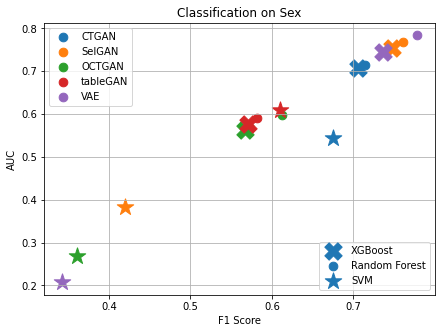

In [281]:
fig, ax = plt.subplots(figsize = (7,5))

colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']

xgb_ctgan = ax.scatter(adult_acc["XGB"]["CTGAN"], adult_f1["XGB"]["CTGAN"], marker='X', color=colors[0],s = 300)
rf_ctgan = ax.scatter(adult_acc["RF"]["CTGAN"], adult_f1["RF"]["CTGAN"], marker='.', color=colors[0],s = 300,label = "CTGAN")
svm_ctgan = ax.scatter(adult_acc["SVM"]["CTGAN"], adult_f1["SVM"]["CTGAN"], marker='*', color=colors[0],s = 300)

xgb_selgan = ax.scatter(adult_acc["XGB"]["Selgan"], adult_f1["XGB"]["Selgan"], marker='X', color=colors[1],s = 300)
rf_selgan = ax.scatter(adult_acc["RF"]["Selgan"], adult_f1["RF"]["Selgan"], marker='.', color=colors[1],s = 300,label = "SelGAN")
svm_selgan = ax.scatter(adult_acc["SVM"]["Selgan"], adult_f1["SVM"]["Selgan"], marker='*', color=colors[1],s = 300)

xgb_octgan = ax.scatter(adult_acc["XGB"]["octgan"], adult_f1["XGB"]["octgan"], marker='X', color=colors[2],s = 300)
rf_octgan = ax.scatter(adult_acc["RF"]["octgan"], adult_f1["RF"]["octgan"], marker='.', color=colors[2],s = 300,label = "OCTGAN")
svm_octgan = ax.scatter(adult_acc["SVM"]["octgan"], adult_f1["SVM"]["octgan"], marker='*', color=colors[2],s = 300)

xgb_tablegan = ax.scatter(adult_acc["XGB"]["tablegan"], adult_f1["XGB"]["tablegan"], marker='X', color=colors[3],s = 300)
rf_tablegan = ax.scatter(adult_acc["RF"]["tablegan"], adult_f1["RF"]["tablegan"], marker='.', color=colors[3],s = 300,label = "tableGAN")
svm_tablegan = ax.scatter(adult_acc["SVM"]["tablegan"], adult_f1["SVM"]["tablegan"], marker='*', color=colors[3],s = 300)

xgb_vae = ax.scatter(adult_acc["XGB"]["VAE"], adult_f1["XGB"]["VAE"], marker='X', color=colors[4],s = 300)
rf_vae = ax.scatter(adult_acc["RF"]["VAE"], adult_f1["RF"]["VAE"], marker='.', color=colors[4],s = 300,label = "VAE")
svm_vae = ax.scatter(adult_acc["SVM"]["VAE"], adult_f1["SVM"]["VAE"], marker='*', color=colors[4],s = 300)

ax.grid()
#plt.legend()
le1 = ax.legend((rf_ctgan, rf_selgan, rf_octgan, rf_tablegan, rf_vae),
           ('CTGAN', 'SelGAN', 'OCTGAN', 'tableGAN', 'VAE'),
           loc='upper left')
ax.add_artist(le1)

le2 = ax.legend((xgb_ctgan, rf_ctgan,svm_ctgan),
           ('XGBoost', 'Random Forest',"SVM"),
           loc='lower right')
ax.set_xlabel("F1 Score")
ax.set_ylabel("AUC")
ax.set_title("Classification on Sex")
plt.show()

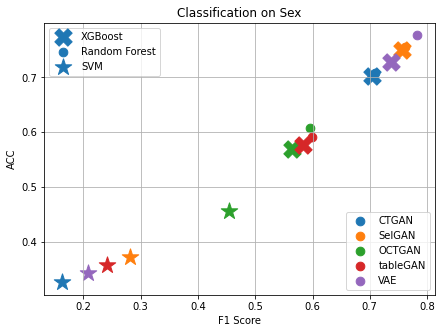

In [171]:
import matplotlib.pyplot as plt
from numpy.random import random

fig, ax = plt.subplots(figsize = (7,5))

colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']

xgb_ctgan = ax.scatter(sex_f1["XGB"]["CTGAN"], sex_acc["XGB"]["CTGAN"], marker='X', color=colors[0],s = 300)
rf_ctgan = ax.scatter(sex_f1["RF"]["CTGAN"], sex_acc["RF"]["CTGAN"], marker='.', color=colors[0],s = 300,label = "CTGAN")
svm_ctgan = ax.scatter(sex_f1["SVM"]["CTGAN"], sex_acc["SVM"]["CTGAN"], marker='*', color=colors[0],s = 300)

xgb_selgan = ax.scatter(sex_f1["XGB"]["Selgan"], sex_acc["XGB"]["Selgan"], marker='X', color=colors[1],s = 300)
rf_selgan = ax.scatter(sex_f1["RF"]["Selgan"], sex_acc["RF"]["Selgan"], marker='.', color=colors[1],s = 300,label = "SelGAN")
svm_selgan = ax.scatter(sex_f1["SVM"]["Selgan"], sex_acc["SVM"]["Selgan"], marker='*', color=colors[1],s = 300)

xgb_octgan = ax.scatter(sex_f1["XGB"]["octgan"], sex_acc["XGB"]["octgan"], marker='X', color=colors[2],s = 300)
rf_octgan = ax.scatter(sex_f1["RF"]["octgan"], sex_acc["RF"]["octgan"], marker='.', color=colors[2],s = 300,label = "OCTGAN")
svm_octgan = ax.scatter(sex_f1["SVM"]["octgan"], sex_acc["SVM"]["octgan"], marker='*', color=colors[2],s = 300)

xgb_tablegan = ax.scatter(sex_f1["XGB"]["tablegan"], sex_acc["XGB"]["tablegan"], marker='X', color=colors[3],s = 300)
rf_tablegan = ax.scatter(sex_f1["RF"]["tablegan"], sex_acc["RF"]["tablegan"], marker='.', color=colors[3],s = 300,label = "tableGAN")
svm_tablegan = ax.scatter(sex_f1["SVM"]["tablegan"], sex_acc["SVM"]["tablegan"], marker='*', color=colors[3],s = 300)

xgb_vae = ax.scatter(sex_f1["XGB"]["VAE"], sex_acc["XGB"]["VAE"], marker='X', color=colors[4],s = 300)
rf_vae = ax.scatter(sex_f1["RF"]["VAE"], sex_acc["RF"]["VAE"], marker='.', color=colors[4],s = 300,label = "VAE")
svm_vae = ax.scatter(sex_f1["SVM"]["VAE"], sex_acc["SVM"]["VAE"], marker='*', color=colors[4],s = 300)

ax.grid()
#plt.legend()
le1 = ax.legend((rf_ctgan, rf_selgan, rf_octgan, rf_tablegan, rf_vae),
           ('CTGAN', 'SelGAN', 'OCTGAN', 'tableGAN', 'VAE'),
           loc='lower right')
ax.add_artist(le1)

le2 = ax.legend((xgb_ctgan, rf_ctgan,svm_ctgan),
           ('XGBoost', 'Random Forest',"SVM"),
           loc='upper left')
ax.set_xlabel("F1 Score")
ax.set_ylabel("ACC")
ax.set_title("Classification on Sex")
plt.savefig("evaluation_result/{}/clf_{}.png".format(dataname,"sex"))
plt.show()

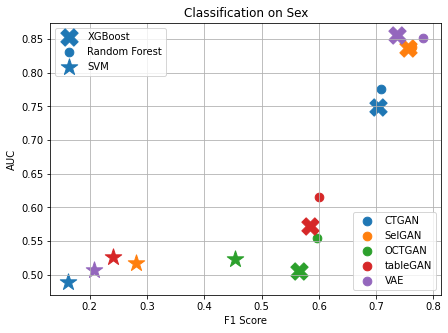

In [180]:
import matplotlib.pyplot as plt
from numpy.random import random

fig, ax = plt.subplots(figsize = (7,5))

colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']

xgb_ctgan = ax.scatter(sex_f1["XGB"]["CTGAN"], sex_auc["XGB"]["CTGAN"], marker='X', color=colors[0],s = 300)
rf_ctgan = ax.scatter(sex_f1["RF"]["CTGAN"], sex_auc["RF"]["CTGAN"], marker='.', color=colors[0],s = 300,label = "CTGAN")
svm_ctgan = ax.scatter(sex_f1["SVM"]["CTGAN"], sex_auc["SVM"]["CTGAN"], marker='*', color=colors[0],s = 300)

xgb_selgan = ax.scatter(sex_f1["XGB"]["Selgan"], sex_auc["XGB"]["Selgan"], marker='X', color=colors[1],s = 300)
rf_selgan = ax.scatter(sex_f1["RF"]["Selgan"], sex_auc["RF"]["Selgan"], marker='.', color=colors[1],s = 300,label = "SelGAN")
svm_selgan = ax.scatter(sex_f1["SVM"]["Selgan"], sex_auc["SVM"]["Selgan"], marker='*', color=colors[1],s = 300)

xgb_octgan = ax.scatter(sex_f1["XGB"]["octgan"], sex_auc["XGB"]["octgan"], marker='X', color=colors[2],s = 300)
rf_octgan = ax.scatter(sex_f1["RF"]["octgan"], sex_auc["RF"]["octgan"], marker='.', color=colors[2],s = 300,label = "OCTGAN")
svm_octgan = ax.scatter(sex_f1["SVM"]["octgan"], sex_auc["SVM"]["octgan"], marker='*', color=colors[2],s = 300)

xgb_tablegan = ax.scatter(sex_f1["XGB"]["tablegan"], sex_auc["XGB"]["tablegan"], marker='X', color=colors[3],s = 300)
rf_tablegan = ax.scatter(sex_f1["RF"]["tablegan"], sex_auc["RF"]["tablegan"], marker='.', color=colors[3],s = 300,label = "tableGAN")
svm_tablegan = ax.scatter(sex_f1["SVM"]["tablegan"], sex_auc["SVM"]["tablegan"], marker='*', color=colors[3],s = 300)

xgb_vae = ax.scatter(sex_f1["XGB"]["VAE"], sex_auc["XGB"]["VAE"], marker='X', color=colors[4],s = 300)
rf_vae = ax.scatter(sex_f1["RF"]["VAE"], sex_auc["RF"]["VAE"], marker='.', color=colors[4],s = 300,label = "VAE")
svm_vae = ax.scatter(sex_f1["SVM"]["VAE"], sex_auc["SVM"]["VAE"], marker='*', color=colors[4],s = 300)

ax.grid()
#plt.legend()
le1 = ax.legend((rf_ctgan, rf_selgan, rf_octgan, rf_tablegan, rf_vae),
           ('CTGAN', 'SelGAN', 'OCTGAN', 'tableGAN', 'VAE'),
           loc='lower right')
ax.add_artist(le1)

le2 = ax.legend((xgb_ctgan, rf_ctgan,svm_ctgan),
           ('XGBoost', 'Random Forest',"SVM"),
           loc='upper left')
ax.set_xlabel("F1 Score")
ax.set_ylabel("AUC")
ax.set_title("Classification on Sex")
plt.savefig("evaluation_result/{}/clf_{}.png".format(dataname,"sex"))
plt.show()


In [ ]:
ct

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,label
0,23.0,2,370864.0,15,10.0,4,0,2,1,0,-15.0,-4.0,34.0,17,0,ctgan
1,26.0,2,45546.0,11,13.0,4,7,4,0,0,-9.0,1.0,14.0,37,0,ctgan
2,54.0,2,293758.0,12,15.0,5,6,0,2,1,-33.0,3.0,40.0,24,0,ctgan
3,46.0,1,291516.0,11,10.0,6,5,0,4,0,36.0,-2.0,54.0,37,0,ctgan
4,23.0,2,215345.0,11,9.0,2,11,3,4,1,-57.0,-2.0,40.0,24,0,ctgan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30143,32.0,3,210409.0,11,12.0,2,9,0,4,1,31.0,1.0,50.0,37,0,ctgan
30144,33.0,4,278420.0,9,14.0,2,2,5,4,1,0.0,0.0,40.0,37,0,ctgan
30145,61.0,2,161391.0,11,10.0,5,2,4,4,1,-71.0,2.0,15.0,31,0,ctgan
30146,19.0,2,221536.0,9,10.0,4,9,0,4,1,-23.0,-2.0,40.0,37,0,ctgan


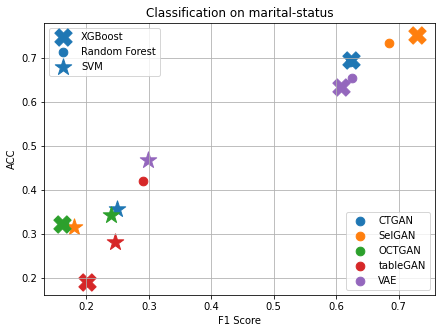

In [202]:
fig, ax = plt.subplots(figsize = (7,5))

xgb_ctgan = ax.scatter(ms_f1["XGB"]["CTGAN"], ms_acc["XGB"]["CTGAN"], marker='X', color=colors[0],s = 300)
rf_ctgan = ax.scatter(ms_f1["RF"]["CTGAN"], ms_acc["RF"]["CTGAN"], marker='.', color=colors[0],s = 300,label = "CTGAN")
svm_ctgan = ax.scatter(ms_f1["SVM"]["CTGAN"], ms_acc["SVM"]["CTGAN"], marker='*', color=colors[0],s = 300)

xgb_selgan = ax.scatter(ms_f1["XGB"]["Selgan"], ms_acc["XGB"]["Selgan"], marker='X', color=colors[1],s = 300)
rf_selgan = ax.scatter(ms_f1["RF"]["Selgan"], ms_acc["RF"]["Selgan"], marker='.', color=colors[1],s = 300,label = "SelGAN")
svm_selgan = ax.scatter(ms_f1["SVM"]["Selgan"], ms_acc["SVM"]["Selgan"], marker='*', color=colors[1],s = 300)

xgb_octgan = ax.scatter(ms_f1["XGB"]["octgan"], ms_acc["XGB"]["octgan"], marker='X', color=colors[2],s = 300)
rf_octgan = ax.scatter(ms_f1["RF"]["octgan"], ms_acc["RF"]["octgan"], marker='.', color=colors[2],s = 300,label = "OCTGAN")
svm_octgan = ax.scatter(ms_f1["SVM"]["octgan"], ms_acc["SVM"]["octgan"], marker='*', color=colors[2],s = 300)

xgb_tablegan = ax.scatter(ms_f1["XGB"]["tablegan"], ms_acc["XGB"]["tablegan"], marker='X', color=colors[3],s = 300)
rf_tablegan = ax.scatter(ms_f1["RF"]["tablegan"], ms_acc["RF"]["tablegan"], marker='.', color=colors[3],s = 300,label = "tableGAN")
svm_tablegan = ax.scatter(ms_f1["SVM"]["tablegan"], ms_acc["SVM"]["tablegan"], marker='*', color=colors[3],s = 300)

xgb_vae = ax.scatter(ms_f1["XGB"]["VAE"], ms_acc["XGB"]["VAE"], marker='X', color=colors[4],s = 300)
rf_vae = ax.scatter(ms_f1["RF"]["VAE"], ms_acc["RF"]["VAE"], marker='.', color=colors[4],s = 300,label = "VAE")
svm_vae = ax.scatter(ms_f1["SVM"]["VAE"], ms_acc["SVM"]["VAE"], marker='*', color=colors[4],s = 300)

ax.grid()
#plt.legend()
le1 = ax.legend((rf_ctgan, rf_selgan, rf_octgan, rf_tablegan, rf_vae),
           ('CTGAN', 'SelGAN', 'OCTGAN', 'tableGAN', 'VAE'),
           loc='lower right')
ax.add_artist(le1)

le2 = ax.legend((xgb_ctgan, rf_ctgan,svm_ctgan),
           ('XGBoost', 'Random Forest',"SVM"),
           loc='upper left')
ax.set_xlabel("F1 Score")
ax.set_ylabel("ACC")
ax.set_title("Classification on marital-status")
plt.savefig("evaluation_result/{}/clf_{}.png".format(dataname,"ms"))
plt.show()

In [177]:
ms_f1

,XGB,RF,SVM,avg
Origin,0.830906,0.822840,0.286258,0.646668
CTGAN,0.622998,0.622316,0.059175,0.434829
Selgan,0.729238,0.660829,0.197104,0.529057
octgan,0.160792,0.164581,0.002593,0.109322
tablegan,0.201144,0.303484,0.087478,0.197369
VAE,0.608067,0.625229,0.314595,0.515964


In [132]:
make_prediction("education", "clf",training_data, test,dataset)

100%|██████████| 5/5 [01:05<00:00, 13.02s/it]


([1.0,
  0.35006634232640427,
  0.5872401592215833,
  0.20212295444493586,
  0.006855373728438744,
  0.5026536930561698],
 [1.0,
  0.22589487756724286,
  0.5352616266092072,
  0.18014651248842367,
  0.0014490670098935058,
  0.34730858932369635])

In [140]:
make_prediction("capital-loss", "reg",training_data, test,dataset)

100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


[165610.64589546353,
 166451.02491770237,
 194572.63932275822,
 166491.6220234039,
 234897.5370403336,
 184783.36326203105]

In [139]:
make_prediction("hours-per-week", "reg",training_data, test,dataset)

100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


[108.16680295187327,
 143.05354597477339,
 148.13538023959575,
 208.04594414384738,
 409.43378033039886,
 149.15008302031853]

In [137]:
make_prediction("education-num", "reg",training_data, test,dataset)

100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


[0.003974168196389847,
 6.186706885291035,
 3.8204408183816456,
 7.20330760033567,
 9.548539979657487,
 5.908915706613958]

In [131]:
make_prediction("education", "reg",training_data, test,dataset)

100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


[4.315685507955905e-10,
 14.796763007687902,
 9.421108340312825,
 20.17345432304931,
 91.00006488159366,
 14.895680269314077]

its:7 col
full:7 col

In [141]:
def make_clustering(training_data,test,dataset,n = 5):
    NMI = []

    train_data_x = training_data.drop(columns=["income"]).astype("float64")

    test_data_X = test.drop(columns=["income"]).astype("float64")
    
    kmeans = KMeans(n_clusters=n).fit(train_data_x)

    ground_truth = kmeans.predict(test_data_X)

    NMI.append(normalized_mutual_info_score(ground_truth, ground_truth))
    #print(train_data_x.columns)

    for data in dataset:
        data = data.drop(columns=["label","fnlwgt","income"]).astype("float64")
        #print(data.columns)
        kmeans = KMeans(n_clusters=n, random_state=0).fit(data)
        result = kmeans.predict(test_data_X)
        NMI.append(normalized_mutual_info_score(ground_truth, result))




    return NMI
### Clustering

In [142]:
## Unsupervised Machine learning task 
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
pd.DataFrame(make_clustering(training_data,test,dataset,n=3),index=["ground Truth",'ctgan','selgan',"octgan","tablegan",'VAE'],columns=["Clustering NMI"])

,Clustering NMI
ground Truth,1.000000
ctgan,0.838548
selgan,0.866171
octgan,0.765607
tablegan,0.615877
VAE,0.735036


### Approximate query processing (AQP)

AQP 
* http://dbgroup.cs.tsinghua.edu.cn/ligl/baq.pdf 
* https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9101822


### Privacy protection

#### Hitting Rate & DCR

In [ ]:
len(dataset)

In [ ]:
similar = hitting_rate(dataset)

In [ ]:
maxi,mini = DCR(dataset)


In [ ]:
pd.DataFrame(np.array([similar,maxi,mini]).T,index=["Origin GAN","Strong-Num_its","Weak-Num_its","Strong-Cate_its","Weak-Cate_its","Strong-Num_full","Weak-Num_full","Strong-Cate_full","Weak-Cate_full"],columns=["Exactly Same data (Categorical)","Distance to the furthest record","Distance to the closest record"])